# Data Analysis

In this interactive notebook, we perform analysis on the data that we merged in the [previous notebook](data-merging.ipynb). Here, we aim to perform some analysis on the merged and cleaned data, producing some visualizations and important statistical information to help us answer some of the questions outlined in the [ReadMe](README.md).

----

Let's start by importing the required libraries.

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
sns.set_context('talk')

In [99]:
%matplotlib inline

Let us now import our cleaned and merged data from the pickle file stored at [cleaned_data/final_data_merged.pkl](./cleaned_data/final_data_merged.pkl).

In [100]:
final_data = pd.read_pickle('cleaned_data/final_data_merged.pkl')

In [101]:
final_data.head()

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
20,tt0249516,Foodfight!,Foodfight!,2012,"[Action, Animation, Comedy]",[nm0440415],"[nm0440415, nm0923312, nm0295165, nm0841854, n...",1.9,8248.0,2012-12-31,45000000.0,0.0,7.370600e+04
48,tt0337692,On the Road,On the Road,2012,"[Adventure, Drama, Romance]",[nm0758574],"[nm0449616, nm1433580]",6.1,37886.0,2013-03-22,25000000.0,720828.0,9.313302e+06
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"[Adventure, Comedy, Drama]",[nm0001774],"[nm0175726, nm0862122]",7.3,275300.0,2013-12-25,91000000.0,58236838.0,1.878612e+08
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"[Action, Crime, Drama]",[nm0291082],"[nm0088747, nm0291082]",6.5,105116.0,2014-09-19,28000000.0,26017685.0,6.210859e+07
60,tt0369610,Jurassic World,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",[nm1119880],"[nm0415425, nm0798646, nm1119880, nm2081046, n...",7.0,539338.0,2015-06-12,215000000.0,652270625.0,1.648855e+09


We can encapsulate some of the budgeting and revenue information into the return on investment, which we will store in a new field for later use in plotting.

In [102]:
final_data['ROI'] = ((final_data['worldwide_gross']
                      - final_data['production_budget'])
                     / final_data['production_budget']) * 100

In [103]:
final_data.head()

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,ROI
20,tt0249516,Foodfight!,Foodfight!,2012,"[Action, Animation, Comedy]",[nm0440415],"[nm0440415, nm0923312, nm0295165, nm0841854, n...",1.9,8248.0,2012-12-31,45000000.0,0.0,7.370600e+04,-99.836209
48,tt0337692,On the Road,On the Road,2012,"[Adventure, Drama, Romance]",[nm0758574],"[nm0449616, nm1433580]",6.1,37886.0,2013-03-22,25000000.0,720828.0,9.313302e+06,-62.746792
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"[Adventure, Comedy, Drama]",[nm0001774],"[nm0175726, nm0862122]",7.3,275300.0,2013-12-25,91000000.0,58236838.0,1.878612e+08,106.440860
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"[Action, Crime, Drama]",[nm0291082],"[nm0088747, nm0291082]",6.5,105116.0,2014-09-19,28000000.0,26017685.0,6.210859e+07,121.816382
60,tt0369610,Jurassic World,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",[nm1119880],"[nm0415425, nm0798646, nm1119880, nm2081046, n...",7.0,539338.0,2015-06-12,215000000.0,652270625.0,1.648855e+09,666.909239


Somehow, we need to best make use of our genre descriptors. We currently have lists of strings, and it would be nice to produce some sort of histogram using this information. Let's try flattening out our genre descriptions into dummy variables. We have to do a bit of additional processing to make the input suitable for Pandas's `get_dummies` function.

In [104]:
genre_dummies = pd.get_dummies(final_data.genres.apply(pd.Series).stack()).sum(level=0)

In [105]:
genre_dummies.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
20,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
54,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
58,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
60,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [106]:
genre_dummies.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'],
      dtype='object')

Let's join our original merged data with our genre dummies, so that we can look at some summary information.

In [107]:
final_with_genre_dummies = final_data.join(genre_dummies, how='outer')

We might also want to take a look at a correlation table, to see if there are any variables that are obviously correlated, and that we can explore later on.

In [108]:
correl_table = final_data.corr()
correl_table

,start_year,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,ROI
start_year,1.000000,0.048592,-0.043684,0.102462,0.104921,0.115488,0.031860
averagerating,0.048592,1.000000,0.464911,0.209422,0.287181,0.270930,0.026794
numvotes,-0.043684,0.464911,1.000000,0.554988,0.653605,0.642382,0.089905
production_budget,0.102462,0.209422,0.554988,1.000000,0.724452,0.792679,-0.020642
domestic_gross,0.104921,0.287181,0.653605,0.724452,1.000000,0.947475,0.120453
worldwide_gross,0.115488,0.270930,0.642382,0.792679,0.947475,1.000000,0.103602
ROI,0.031860,0.026794,0.089905,-0.020642,0.120453,0.103602,1.000000


For a more visual description of the data, however, we should probably do a bit of plotting. Since we are going to want to plot within genres, we might want to store the number of different possible genres so that we can easily know how many subplots we will need.

In [110]:
num_subplots = len(genre_dummies.columns)
num_subplots

21

This data helps to illustrate a few facts. For one, there is no strong correlation between the date of release and the return on investment, which suggests that within the given timeframe, the relative popularity of any given genre doesn't seem to be changing. This plot also illustrates the presence of a few outliers which may be affecting the data analysis adversely.

In [111]:
final_data['release_year'] = final_data.release_date.dt.year

In [112]:
final_data.groupby('release_year').describe()['ROI']

,count,mean,std,min,25%,50%,75%,max
release_year,,,,,,,,
2010,175.0,218.498954,596.531301,-100.0,-15.394588,83.243750,232.421949,5817.067733
2011,201.0,190.738618,594.867565,-100.0,-53.183722,80.738155,214.043708,6558.059067
2012,197.0,271.163092,876.672379,-100.0,-49.066667,68.449583,293.627420,10075.949000
2013,197.0,191.269182,422.672506,-100.0,-59.148083,100.703767,251.785447,2942.219367
2014,213.0,177.674962,446.176564,-100.0,-94.246290,54.872124,273.931388,3851.737231
2015,255.0,299.268800,2646.385969,-100.0,-100.000000,-22.189083,188.249074,41556.474000
2016,179.0,244.377970,541.392791,-100.0,-41.230350,95.915130,293.698348,4249.700800
2017,132.0,366.966122,767.769123,-100.0,14.954915,155.018377,385.728292,5479.296120
2018,119.0,305.297444,470.916246,-100.0,5.266511,147.341730,509.658293,2617.924114


Let's now consider a further visualization of the return on investment over time broken up by genre. We may use Pandas's Grouper object to specify a custom grouping within business quarters. From here, we can plot the mean return on investment as develops within these quarters, broken into each specific genre.

This data reveals that many genres have suffered from long periods where the return on investment is not particularly high. While there are not really any trends indicating that one type of movie is becoming more popular than another, we can conclude from this plot that certain genres offer a higher probability of being successful in terms of the return on investment.

Let's also take a look at some histograms of the average rating data.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


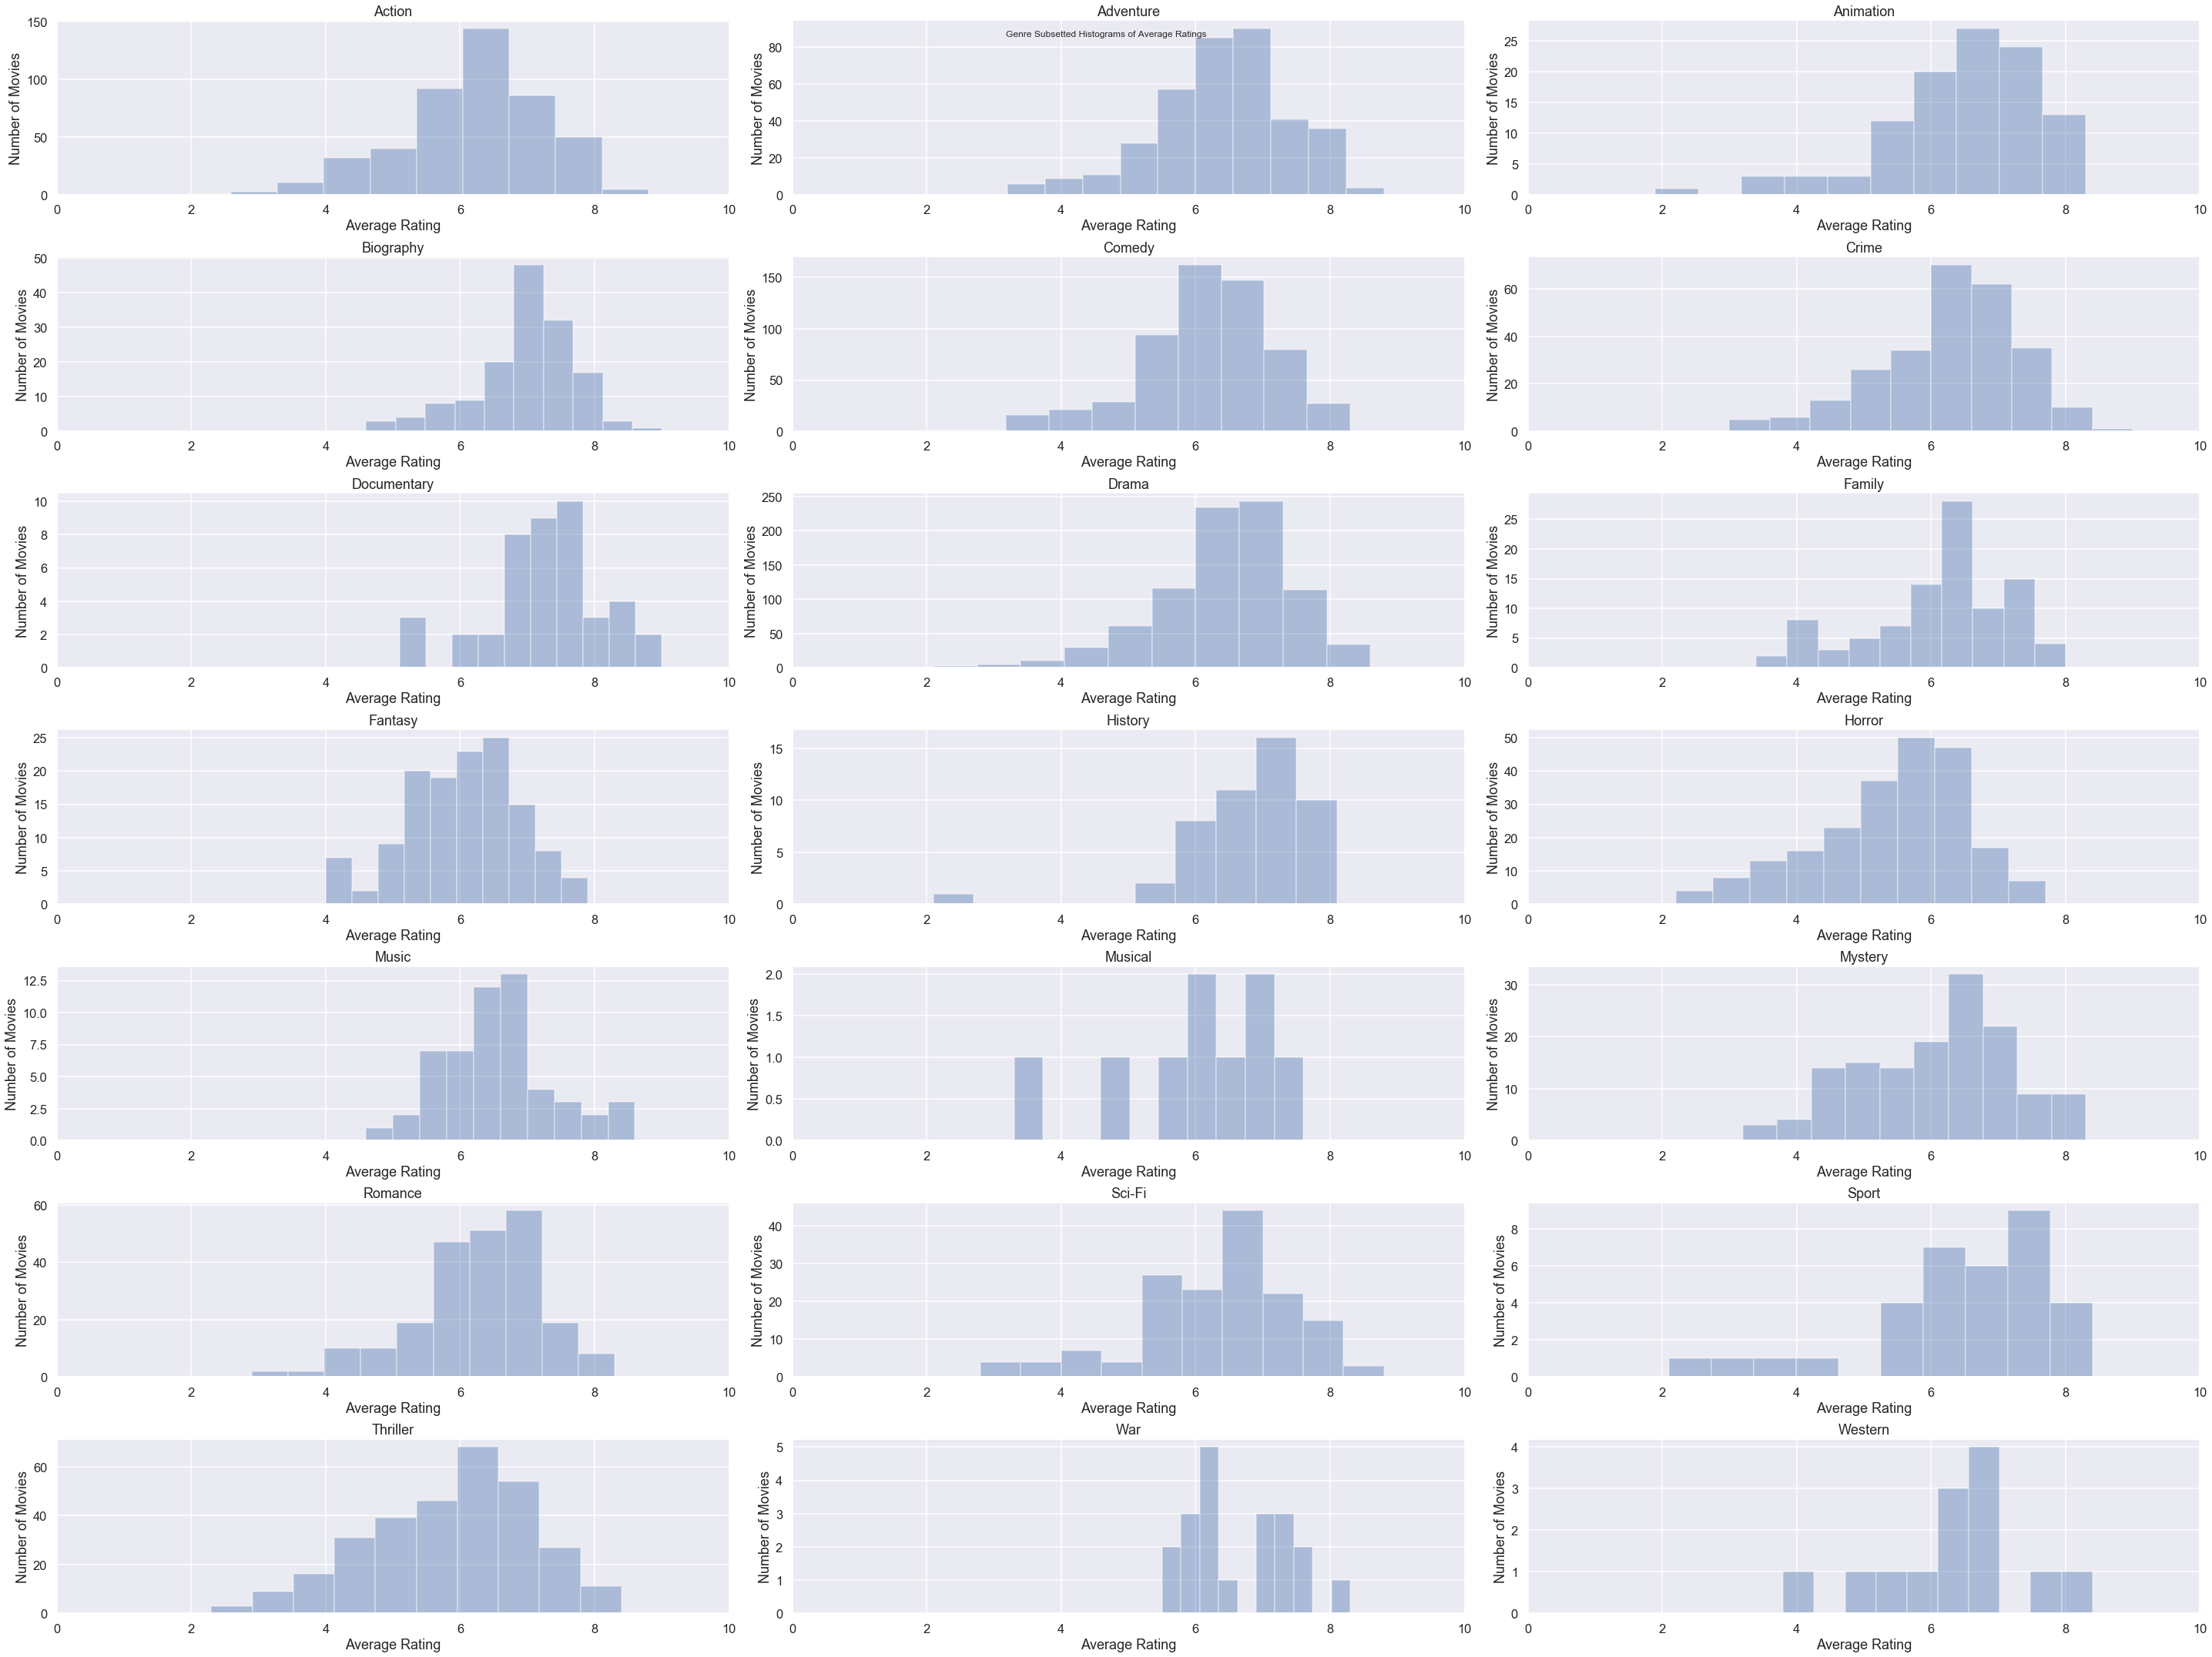

In [113]:
rows = 7
cols = 3
genre_subset_f1, genre_subset_ax1 = plt.subplots(nrows=rows, ncols=cols, figsize=(40, 30))

for i in range(num_subplots):
    genre = genre_dummies.columns[i]
    row = i // cols
    col = i % cols
    cur_ax = genre_subset_ax1[row, col]
    cur_subset = final_data[genre_dummies[genre] == 1];
    sns.distplot(cur_subset.averagerating, kde=False, bins=10, ax=cur_ax)
    cur_ax.set_xlim(0,10)
    cur_ax.set_title(genre)
    cur_ax.set_xlabel('Average Rating')
    cur_ax.set_ylabel('Number of Movies')

genre_subset_f1.suptitle('Genre Subsetted Histograms of Average Ratings')
genre_subset_f1.tight_layout()

We might also want to consider the full aggregation of the return on investment and average ratings by genre.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


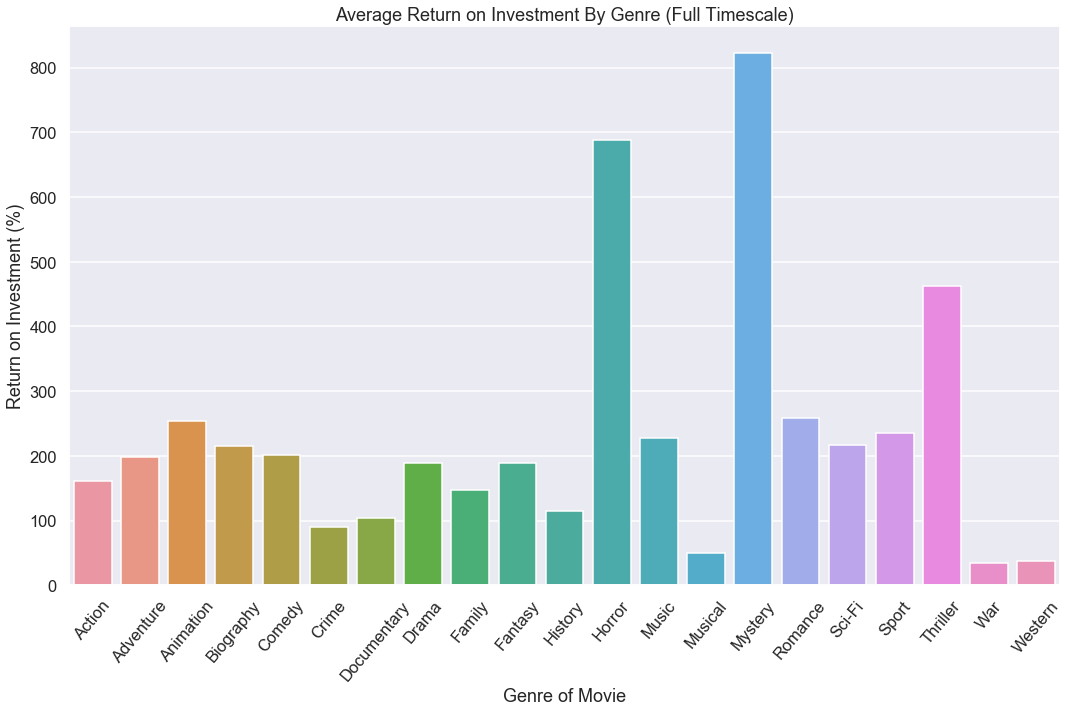

In [114]:
genre_subset_f2, genre_subset_ax2 = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
mean_rois = []

for genre in genre_dummies.columns:
    cur_subset = final_data[genre_dummies[genre] == 1];
    mean_rois.append(cur_subset.ROI.mean())

sns.barplot(x=genre_dummies.columns, y=mean_rois, ax=genre_subset_ax2)
genre_subset_ax2.set_title('Average Return on Investment By Genre (Full Timescale)')
genre_subset_ax2.set_xlabel('Genre of Movie')
genre_subset_ax2.set_ylabel('Return on Investment (%)')
genre_subset_ax2.tick_params(axis='x', labelrotation=50.0)
genre_subset_f2.tight_layout()

We might want to have the return on investment information by genre stored for later use, so let's save it as a new dataframe with the appropriate formatting.

In [123]:
mean_roi_by_genre_df = pd.DataFrame(np.asarray(mean_rois), index=genre_dummies.columns, columns =['mean_roi'])

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


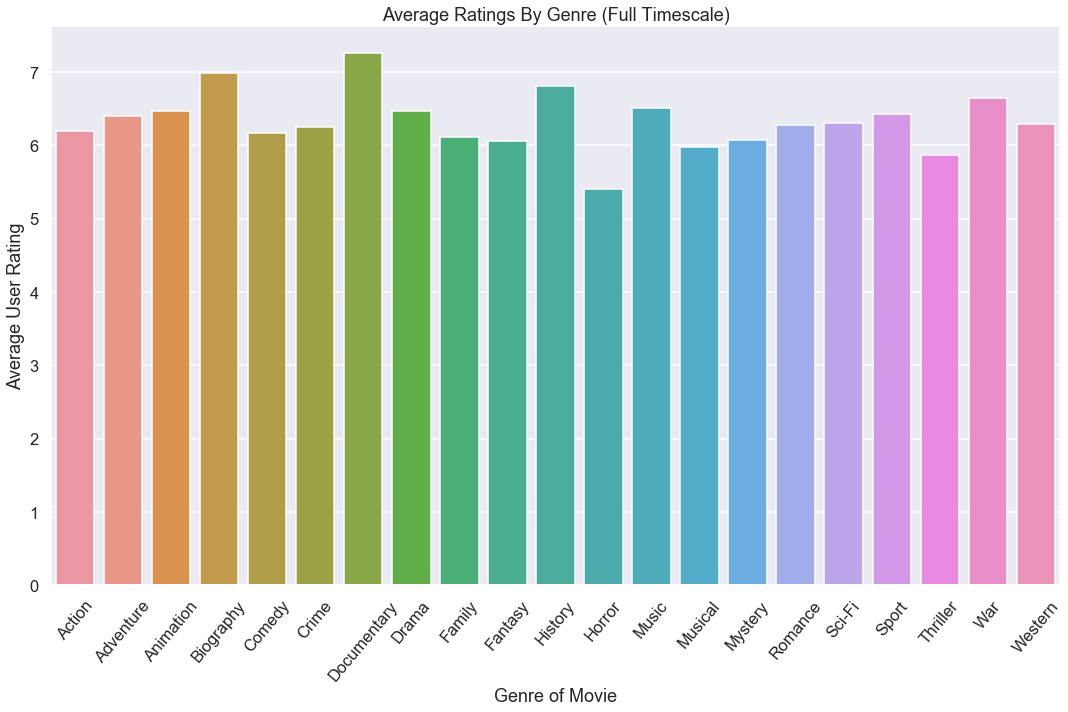

In [124]:
genre_subset_f3, genre_subset_ax3 = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
mean_ratings = []

for genre in genre_dummies.columns:
    cur_subset = final_data[genre_dummies[genre] == 1];
    mean_ratings.append(cur_subset.averagerating.mean())

sns.barplot(x=genre_dummies.columns, y=mean_ratings, ax=genre_subset_ax3)
genre_subset_ax3.set_title('Average Ratings By Genre (Full Timescale)')
genre_subset_ax3.set_xlabel('Genre of Movie')
genre_subset_ax3.set_ylabel('Average User Rating')
genre_subset_ax3.tick_params(axis='x', labelrotation=50.0)
genre_subset_f3.tight_layout()

----
Now, we will consider the effect of particular crews (directors, actors, casts, etc) on the return on investment.

In [125]:
final_data.head()

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,release_year
20,tt0249516,Foodfight!,Foodfight!,2012,"[Action, Animation, Comedy]",[nm0440415],"[nm0440415, nm0923312, nm0295165, nm0841854, n...",1.9,8248.0,2012-12-31,45000000.0,0.0,7.370600e+04,-99.836209,2012
48,tt0337692,On the Road,On the Road,2012,"[Adventure, Drama, Romance]",[nm0758574],"[nm0449616, nm1433580]",6.1,37886.0,2013-03-22,25000000.0,720828.0,9.313302e+06,-62.746792,2013
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"[Adventure, Comedy, Drama]",[nm0001774],"[nm0175726, nm0862122]",7.3,275300.0,2013-12-25,91000000.0,58236838.0,1.878612e+08,106.440860,2013
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"[Action, Crime, Drama]",[nm0291082],"[nm0088747, nm0291082]",6.5,105116.0,2014-09-19,28000000.0,26017685.0,6.210859e+07,121.816382,2014
60,tt0369610,Jurassic World,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",[nm1119880],"[nm0415425, nm0798646, nm1119880, nm2081046, n...",7.0,539338.0,2015-06-12,215000000.0,652270625.0,1.648855e+09,666.909239,2015


In [126]:
director_dummies = pd.get_dummies(final_data.directors.apply(pd.Series).stack()).sum(level=0)
director_dummies.head()

,nm0000095,nm0000108,nm0000110,nm0000123,nm0000127,nm0000128,nm0000142,nm0000149,nm0000154,nm0000158,...,nm6405547,nm6425161,nm6630093,nm6735778,nm6773153,nm7247688,nm7249446,nm8083973,nm8190487,nm9124087
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
writer_dummies = pd.get_dummies(final_data.writers.apply(pd.Series).stack()).sum(level=0)
writer_dummies.head()

,nm0000041,nm0000092,nm0000095,nm0000101,nm0000108,nm0000116,nm0000118,nm0000123,nm0000127,nm0000158,...,nm9195200,nm9204083,nm9204084,nm9204085,nm9259302,nm9351707,nm9592688,nm9610722,nm9634718,nm9984296
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's look first at the top 5 genres in terms of return on investment.

In [128]:
final_with_genre_dummies.head()

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
20,tt0249516,Foodfight!,Foodfight!,2012,"[Action, Animation, Comedy]",[nm0440415],"[nm0440415, nm0923312, nm0295165, nm0841854, n...",1.9,8248.0,2012-12-31,...,0,0,0,0,0,0,0,0,0,0
48,tt0337692,On the Road,On the Road,2012,"[Adventure, Drama, Romance]",[nm0758574],"[nm0449616, nm1433580]",6.1,37886.0,2013-03-22,...,0,0,0,0,1,0,0,0,0,0
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"[Adventure, Comedy, Drama]",[nm0001774],"[nm0175726, nm0862122]",7.3,275300.0,2013-12-25,...,0,0,0,0,0,0,0,0,0,0
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"[Action, Crime, Drama]",[nm0291082],"[nm0088747, nm0291082]",6.5,105116.0,2014-09-19,...,0,0,0,0,0,0,0,0,0,0
60,tt0369610,Jurassic World,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",[nm1119880],"[nm0415425, nm0798646, nm1119880, nm2081046, n...",7.0,539338.0,2015-06-12,...,0,0,0,0,0,1,0,0,0,0


In [129]:
mean_roi_by_genre_df

,mean_roi
Action,161.202457
Adventure,198.406256
Animation,254.596581
Biography,214.752888
Comedy,201.529246
Crime,89.614377
Documentary,103.666061
Drama,189.228176
Family,146.959619
Fantasy,188.239827


Let's also add the correlation value between any genre and the return on investment.

In [130]:
mean_roi_by_genre_df['cor_roi'] = final_with_genre_dummies.corr().loc[genre_dummies.columns, 'ROI']

In [131]:
mean_roi_by_genre_df

,mean_roi,cor_roi
Action,161.202457,-0.044281
Adventure,198.406256,-0.021246
Animation,254.596581,0.002419
Biography,214.752888,-0.007580
Comedy,201.529246,-0.025932
Crime,89.614377,-0.056433
Documentary,103.666061,-0.019364
Drama,189.228176,-0.047621
Family,146.959619,-0.020312
Fantasy,188.239827,-0.013806


Let's now sort this dataframe by the `mean_roi` field, and identify which genres offer the most opportunity for revenue generation.

In [134]:
mean_roi_by_genre_df.sort_values(by='mean_roi', axis='index', inplace=True, ascending=False)

In [135]:
mean_roi_by_genre_df

,mean_roi,cor_roi
Mystery,822.515438,0.149433
Horror,687.538916,0.143449
Thriller,462.891669,0.085869
Romance,258.250330,0.004900
Animation,254.596581,0.002419
Sport,235.177684,-0.001042
Music,227.116495,-0.002574
Sci-Fi,216.295779,-0.007390
Biography,214.752888,-0.007580
Comedy,201.529246,-0.025932


As we can see, Mystery, Horror, and Thriller films all seem to have the most potential for a high return on investment. In order to explore futher, we are going to consider the top movies within these categories by return on investment, and find some suitable talent for future films.

----

Now, we will consider the top ten movies by return on investment within each genre, and from this we will consider the proportions of total gross income that are assigned to the various directors.